In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/football-player-dataset-for-yolov8-hosted/videoplayback.mp4
/kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/README.dataset.txt
/kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/README.roboflow.txt
/kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/data.yaml
/kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/valid/labels.cache
/kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/valid/labels/54745b_9_5_png.rf.277792543ff53b9e63dfe5ebd8b0141e.txt
/kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/valid/labels/08fd33_9_8_png.rf.cc61e7ba09940f4606e4464dd621fe2f.txt
/kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/valid/labels/744b27_1_6_png.rf.a47d969e663ab6a912c9ddcb7ac9ada4.

In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [4]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 3.2 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO
import supervision as sv

model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 76.6MB/s]


In [6]:
!yolo train model=yolov8n.pt data='/kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/data.yaml' epochs=50 imgsz=640

Ultralytics YOLOv8.2.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_t

In [8]:
!yolo detect val model='/kaggle/working/runs/detect/train/weights/best.pt' data='/kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/data.yaml'

Ultralytics YOLOv8.2.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/input/football-player-dataset-for-yolov8-hosted/football-p
val: WARNING ⚠️ Cache directory /kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         43       1025      0.832      0.599      0.638      0.405
                  ball         43         39          1          0     0.0495    0.00991
            goalkeeper         43         32      0.783      0.781      0.842      0.545
                player         43        853      0.859      0.943      0.961      0.646
               referee         43        101      0.686       0.67        0.7      0.421
Speed: 2.4ms preprocess, 41.5ms inference, 0.0ms loss,

In [12]:
!yolo predict model='/kaggle/working/runs/detect/train/weights/best.pt' source='/kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/test/images'

Ultralytics YOLOv8.2.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/19 /kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/test/images/08fd33_3_6_png.rf.8be10169272238a48652496ad4824d2e.jpg: 384x640 19 players, 1 referee, 67.7ms
image 2/19 /kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 384x640 21 players, 7.9ms
image 3/19 /kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 384x640 1 goalkeeper, 25 players, 2 referees, 6.9ms
image 4/19 /kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg: 384x640 1 goalkeepe

In [9]:
!yolo predict model='/kaggle/working/runs/detect/train/weights/best.pt' source='/kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/test/images/08fd33_3_6_png.rf.8be10169272238a48652496ad4824d2e.jpg'

Ultralytics YOLOv8.2.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/test/images/08fd33_3_6_png.rf.8be10169272238a48652496ad4824d2e.jpg: 384x640 19 players, 1 referee, 77.4ms
Speed: 4.7ms preprocess, 77.4ms inference, 1615.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [14]:
import matplotlib.pyplot as plt
import tensorboard

In [17]:
%reload_ext tensorboard
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 478), started 0:00:40 ago. (Use '!kill 478' to kill it.)


0: 384x640 19 players, 1 referee, 76.0ms
Speed: 6.4ms preprocess, 76.0ms inference, 1903.5ms postprocess per image at shape (1, 3, 384, 640)


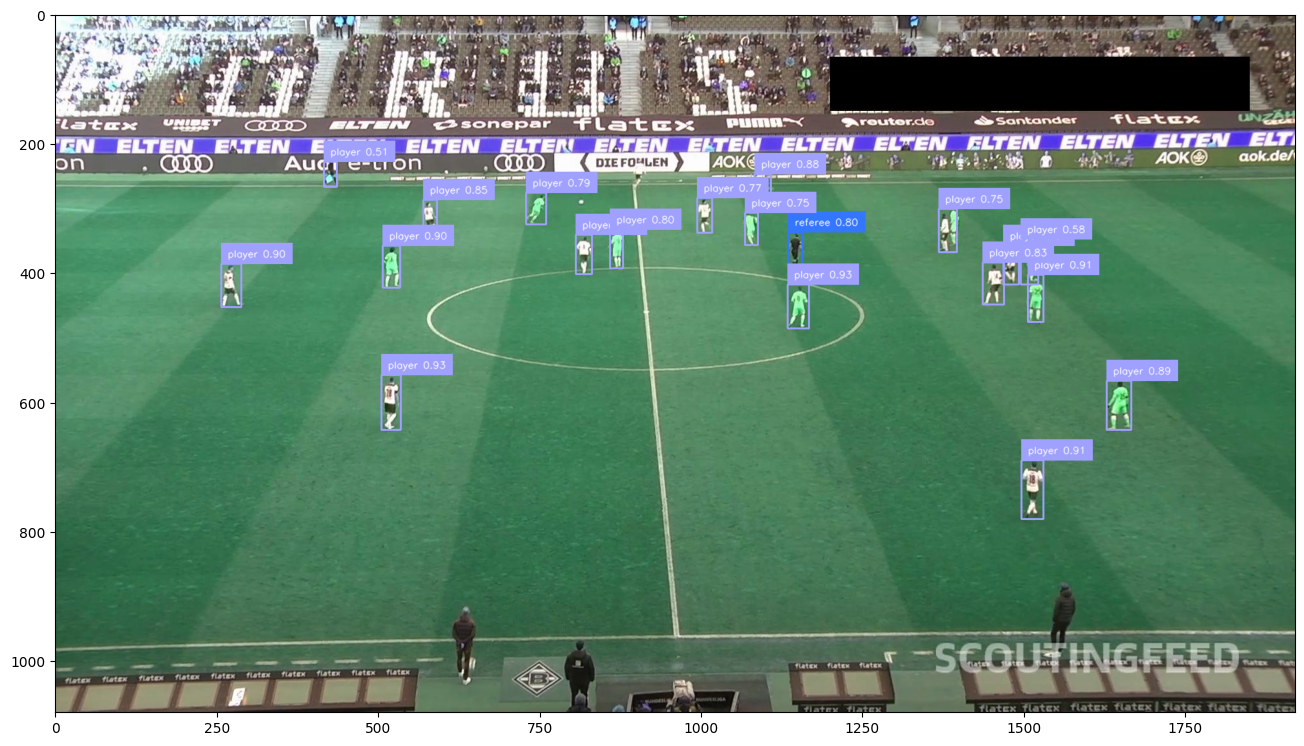

In [18]:
import cv2
import supervision as sv
from ultralytics import YOLO

model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
image = cv2.imread('/kaggle/input/football-player-dataset-for-yolov8-hosted/football-players-detection.v9i.yolov8/test/images/08fd33_3_6_png.rf.8be10169272238a48652496ad4824d2e.jpg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(annotated_image)

In [ ]:
# import numpy as np
# import supervision as sv
# from ultralytics import YOLO

# model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
# tracker = sv.ByteTrack()
# box_annotator = sv.BoundingBoxAnnotator()

# def callback(frame: np.ndarray, _: int) -> np.ndarray:
#     results = model(frame)[0]
#     detections = sv.Detections.from_ultralytics(results)
#     detections = tracker.update_with_detections(detections)
#     return box_annotator.annotate(frame.copy(), detections=detections)

# sv.process_video(
#     source_path='/kaggle/input/football-player-dataset-for-yolov8-hosted/videoplayback.mp4',
#     target_path="result.mp4",
#     callback=callback
# )

In [ ]:
# import numpy as np
# import supervision as sv
# from ultralytics import YOLO

# model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
# tracker = sv.ByteTrack()
# box_annotator = sv.BoundingBoxAnnotator()
# label_annotator = sv.LabelAnnotator()
# trace_annotator = sv.TraceAnnotator()

# def callback(frame: np.ndarray, _: int) -> np.ndarray:
#     results = model(frame)[0]
#     detections = sv.Detections.from_ultralytics(results)
#     detections = tracker.update_with_detections(detections)

#     labels = [
#         f"{tracker_id} {results.names[class_id]}"
#         for class_id, tracker_id
#         in zip(detections.class_id, detections.tracker_id)
#     ]

#     annotated_frame = box_annotator.annotate(
#         frame.copy(), detections=detections)
#     annotated_frame = label_annotator.annotate(
#         annotated_frame, detections=detections, labels=labels)
#     return trace_annotator.annotate(
#         annotated_frame, detections=detections)

# sv.process_video(
#     source_path='/kaggle/input/football-player-dataset-for-yolov8-hosted/videoplayback.mp4',
#     target_path="result.mp4",
#     callback=callback
# )